In [1]:
from functions import *
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

/home/marcatt/.local/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
/home/marcatt/.local/lib/python3.8/site-packages/qutip/__init__.py:61: UserWarning: Old version of Cython detected: needed 0.29.20, got 0.29.14.
  warnings.warn(


In [2]:
N_trunc = 4 # we consider up to 4 transmon levels

T_bath_array=np.concatenate((np.linspace(0.01,1,51),np.linspace(1,10,51),np.linspace(10,200,51))) # we span over these values (in Kelvin) of the temperature of the local bath
k_array=np.array([0.01,0.1,1,1.78,10]) # we span over these values for the ratio between gamma_loc2 and gamma_loc1

B_dip=np.zeros(shape=(len(k_array),len(T_bath_array))) # here we store the transmission coefficients for the 00->B transition
DD_dip=np.zeros(shape=(len(k_array),len(T_bath_array))) # here we store the transmission coefficients for the D->D' transition    

i=0
for k in k_array:
    j=0
    for T_loc in T_bath_array:

        omega_tr1=7.809*(10**9)*2*np.pi # frequency of the first transmon (Hz)
        omega_tr2=7.809*(10**9)*2*np.pi # frequency of the first transmon (Hz)
        g=49*1e6*2*np.pi # transmon-transmon coupling constant (Hz)
        beta1=-0.2265*(10**9)*2*np.pi/2  # anharmonicity of the first transmon (Hz)
        beta2=-0.232*(10**9)*2*np.pi/2  # anharmonicity of the first transmon (Hz)
        readout_drive = 11.580886908533707 # readout drive intensity (sqrt(Hz))
        gamma_glob = 30*1e6*2*np.pi # spontaneous emission rate for the global bath (Hz)
        gamma_loc1 = 243.5*1e3 # local spontaneous emission rate for transmon 1 (Hz)
        gamma_loc2 = gamma_loc1 * k  # local spontaneous emission rate for transmon 2 (Hz). k is the ratio between local rates
        T_glob = 0.1 # temperature of the global bath (K)
        
        omega_drive_B = omega_tr1 + g # frequency of the driving field for monitoring the 00->B transition (Hz)
        omega_drive_DD = omega_tr1 + g + beta1 + beta2 # frequency of the driving field for monitoring the D->D' transition (Hz)
        
        B_dip[i,j]=transm_coeff(omega_tr1,omega_tr2,omega_drive_B,beta1,beta2,g,readout_drive,gamma_glob,gamma_loc1,gamma_loc2,T_glob,T_loc,N_trunc)[1]
        DD_dip[i,j]=transm_coeff(omega_tr1,omega_tr2,omega_drive_DD,beta1,beta2,g,readout_drive,gamma_glob,gamma_loc1,gamma_loc2,T_glob,T_loc,N_trunc)[1]

        j+= 1
    i+= 1

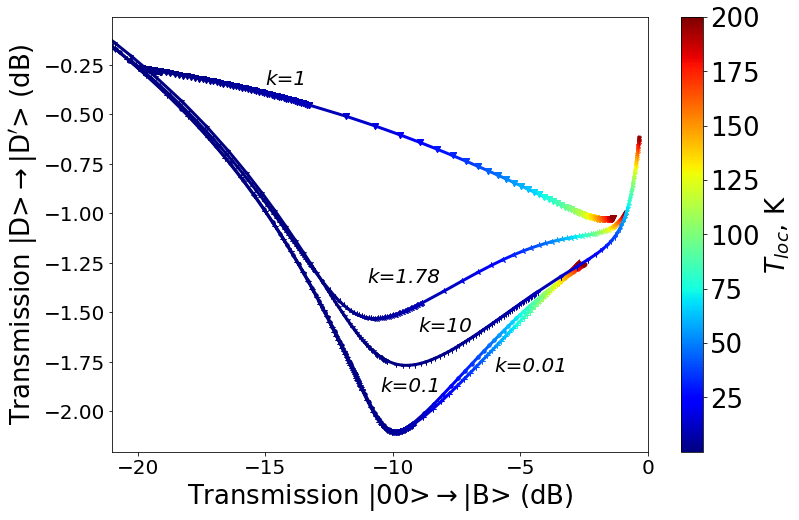

In [4]:
def plot_colourline(x,y,c,label,marker,norm=None):
    col = cm.jet((c-np.min(c))/(np.max(c)-np.min(c)))
    ax = plt.gca()
    for i in np.arange(len(x)-1):
        ax.plot([x[i],x[i+1]], [y[i],y[i+1]], c=col[i],marker=marker,linewidth=3)
    im = ax.scatter(x, y, c=c, s=0, cmap=cm.jet,label=label,norm=norm)
    
    return im

prop = np.concatenate((np.linspace(0.01,1,51),np.linspace(1,10,51),np.linspace(10,200,51)))

# WE PLOT HERE THE BRIGHT-DARK DIAGRAM
fig=plt.figure(figsize=(12,8))
ax  = fig.add_subplot(111)
i=0
im = plot_colourline(B_dip[i],DD_dip[i],prop,label="k={}".format(k_array[i]),marker="+")
i=1
im = plot_colourline(B_dip[i],DD_dip[i],prop,label="k={}".format(k_array[i]),marker=".")
i=2
im = plot_colourline(B_dip[i],DD_dip[i],prop,label="k={}".format(k_array[i]),marker="v")
i=3
im = plot_colourline(B_dip[i],DD_dip[i],prop,label="k={}".format(k_array[i]),marker="2")
i=4
im = plot_colourline(B_dip[i],DD_dip[i],prop,label="k={}".format(k_array[i]),marker="1")
cb=fig.colorbar(im)
cb.set_label('$T_{loc}$, K',fontsize=26)
cb.ax.tick_params(labelsize=26)
plt.xlabel(r'Transmission |00>$\rightarrow$|B> (dB)',fontsize=26)
plt.ylabel(r'Transmission |D>$\rightarrow$|D$^\prime$> (dB)',fontsize=26)
ax.set_xlim([-21,0])
ax.tick_params(labelsize=20)
ax.text(-15, -0.35, 'k=1',style='italic', fontsize=20)
ax.tick_params(labelsize=20)
ax.text(-11, -1.35, 'k=1.78',style='italic', fontsize=20)
ax.tick_params(labelsize=20)
ax.text(-9, -1.6, 'k=10',style='italic', fontsize=20)
ax.tick_params(labelsize=20)
ax.text(-10.5, -1.9, 'k=0.1',style='italic', fontsize=20)
ax.tick_params(labelsize=20)
ax.text(-6, -1.8, 'k=0.01',style='italic', fontsize=20)
ax.tick_params(labelsize=20)